In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   无线信道：传播和衰落.ipynb
@Time    :   2025/05/05 16:41:49
@Author  :   Neutrin 
'''

# here put the import lib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 确保Jupyter Notebook中的图表能正确显示中文
mpl.rc('font', family='SimHei')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 定义参数
v = 3e8  # 光速 
fc = 1.5e9  # 载波频率
lamda = v / fc  # 波长
Gt = 1; Gr = 1  # 天线增益
d0 = 100 # 参考距离
d = np.linspace(1, 1000, 1000)  # 距离范围
sigma = 3 # 衰落标准差
n = 2

In [3]:
def PL_free(Gt,Gr,d,lamda):
    """
    计算自由空间传播损耗
    G1: 发射天线增益
    G2: 接收天线增益
    d: 距离
    lamda: 波长
    """
    return -10*np.log10((Gt*Gr*lamda**2)/(4*np.pi*d**2))

def PL_diffuse(Gt,Gr,d,d0,lamda):
    """
    计算多径传播损耗
    G1: 发射天线增益
    G2: 接收天线增益
    d: 距离
    lamda: 波长
    """
    return -10*np.log10((Gt*Gr*lamda**2)/(4*np.pi*d**2)) + 10*n*np.log10(d/d0)

def PL_shadow(Gt,Gr,d,d0,lamda, num_points=20):
    """
    计算阴影衰落
    G1: 发射天线增益
    G2: 接收天线增益
    d: 距离
    lamda: 波长
    """
        # 选择对数均匀分布的少量距离点
    log_distances = np.logspace(np.log10(d.min()), np.log10(d.max()), num_points)
    
    # 计算这些点的路径损耗
    base_loss = -10*np.log10((Gt*Gr*lamda**2)/(4*np.pi*log_distances**2)) + 10*n*np.log10(log_distances/d0)
    
    # 使用固定随机种子生成随机效应
    np.random.seed(42)  # 使用固定种子确保可重现性
    random_effect = np.random.normal(0, 1, len(log_distances)) * sigma
    
    return log_distances, base_loss + random_effect




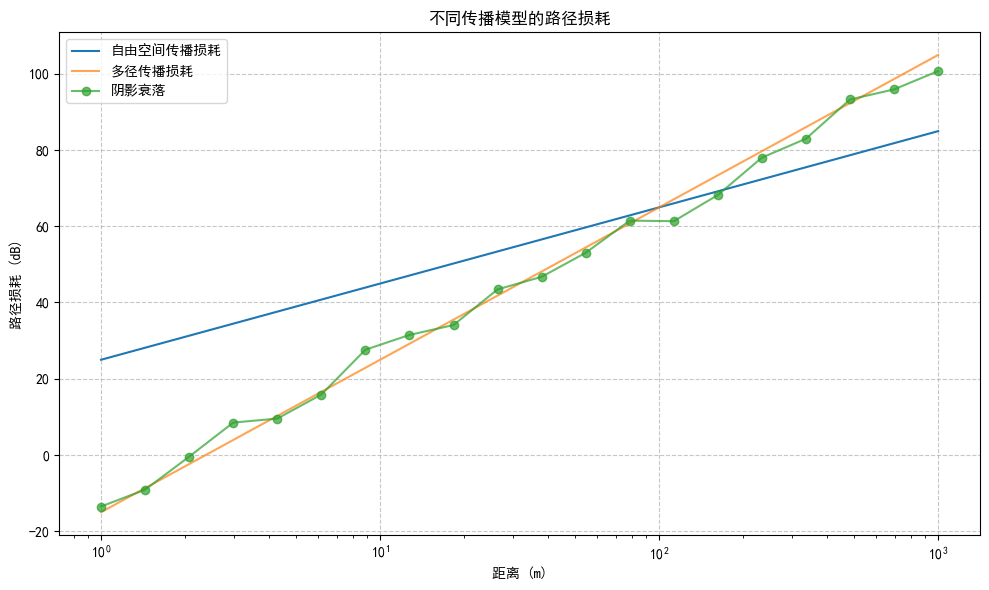

In [4]:
# 计算三种路径损耗
pl_free = PL_free(Gt, Gr, d, lamda)
pl_diffuse = PL_diffuse(Gt, Gr, d, d0, lamda)
shadow_distances, shadow_loss = PL_shadow(Gt, Gr, d, d0, lamda)  # 解构返回的两个值

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制三种路径损耗模型
plt.plot(d, pl_free, label='自由空间传播损耗')
plt.plot(d, pl_diffuse, label='多径传播损耗', alpha=0.7)
plt.plot(shadow_distances, shadow_loss, 'o-', label='阴影衰落', alpha=0.7)  # 使用正确的x和y值

# 设置图形属性
plt.xlabel('距离 (m)')
plt.ylabel('路径损耗 (dB)')
plt.title('不同传播模型的路径损耗')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()